### Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### Data Preperation


In [2]:
#Loading csv dataset 
def load_yelp_review():
  DATA_PATH = "./yelp_reviews.csv"
  df_review = pd.read_csv("yelp_reviews.csv", index_col=0)
  return df_review
df_review = load_yelp_review()

In [3]:
data = df_review


Dataset for this analysis is the Yelp's Reviews Dataset from was downloaded from Kaggle (https://www.kaggle.com/code/omkarsabnis/sentiment-analysis-on-the-yelp-reviews-dataset/data).
This dataset contains 200,000 sentences 


The following are the description of features we have
- **review_id**: ID for published review
- **user_id**: ID of unique user 
- **business_id**: ID of unique business 
- **stars**: Stars given by the user (*)
- **useful**: The number of useful votes the review received
- **funny**: The number of funny votes the review received
- **cool**: The number of cool votes the review received
- **text**: Text review given by user
- **date**: Date of review was posted
 
(*) On a scale of 1 to 5, 1 is totaly dissatisfied and 5 is totaly satisfied



In [4]:
# Data observation
print("Shape of the dataset:")
print(data.shape)
print("Column names:")
print(data.columns)
print("Datatype of each column:")
print(data.dtypes)
print("Few dataset entries:")
print(data.head())
data.describe(include='all')

Shape of the dataset:
(200000, 9)
Column names:
Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')
Datatype of each column:
review_id      object
user_id        object
business_id    object
stars           int64
useful          int64
funny           int64
cool            int64
text           object
date           object
dtype: object
Few dataset entries:
                review_id                 user_id             business_id  \
0  xQY8N_XvtGbearJ5X4QryQ  OwjRMXRC0KyPrIlcjaXeFQ  -MhfebM0QIsKt87iDN-FNw   
1  UmFMZ8PyXZTY2QcwzsfQYA  nIJD_7ZXHq-FX8byPMOkMQ  lbrU8StCq3yDfr-QMnGrmQ   
2  LG2ZaYiOgpr2DK_90pYjNw  V34qejxNsCbcgD8C0HVk-Q  HQl28KMwrEKHqhFrrDqVNQ   
3  i6g_oA9Yf9Y31qt0wibXpw  ofKDkJKXSKZXu5xJNGiiBQ  5JxlZaqCnk1MnbgRirs40Q   
4  6TdNDKywdbjoTkizeMce8A  UgMW8bLE0QMJDCkQ1Ax5Mg  IS4cv902ykd8wj1TR0N3-A   

   stars  useful  funny  cool  \
0      2       5      0     0   
1      1       1      1     0   
2   

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
count,200000,200000,200000,200000.000000,200000.000000,200000.000000,200000.000000,200000,200000
unique,200000,145489,15736,NaN,NaN,NaN,NaN,199825,199731
top,xQY8N_XvtGbearJ5X4QryQ,CxDOIDnH8gp9KXzpBHJYXw,rcaPajgKOJC2vo_l3xa42A,NaN,NaN,NaN,NaN,Finding the Modern Yoga studio has enhanced my...,2017-07-02 20:11:42
freq,1,123,1325,NaN,NaN,NaN,NaN,3,2
mean,NaN,NaN,NaN,3.750115,1.093470,0.370110,0.447525,NaN,NaN
std,NaN,NaN,NaN,1.435254,2.307676,1.315985,1.396118,NaN,NaN
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,4.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,5.000000,1.000000,0.000000,0.000000,NaN,NaN


There are around 200,000 data samples in the sentiment analysis dataset 


Create a new column named "length" to keep track how many characters each review has. Hence, we can get an insight on every Yelp's feedback

In [5]:
data['length'] = data['text'].apply(len)
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16,1373
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52,1407
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11,431
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52,401
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57,841


In [6]:
data.shape

(200000, 10)

### Visualizing dataset
1. Box-plot

<AxesSubplot:xlabel='stars', ylabel='length'>

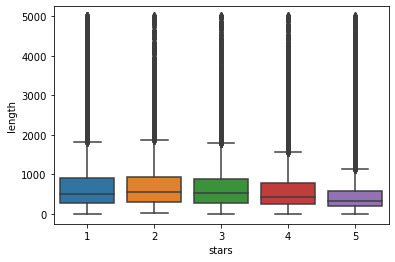

In [7]:
#Box-plot graph of each star rating's text length.
sns.boxplot(x='stars', y='length', data=df_review)

The 1-star and 2-star and 3-star ratings appear to contain significantly longer content based on the plot, however there are numerous anomalies that can be seen as points above the boxes. Meanwhile, 5-star rating has the shortest length

2. Bar graph

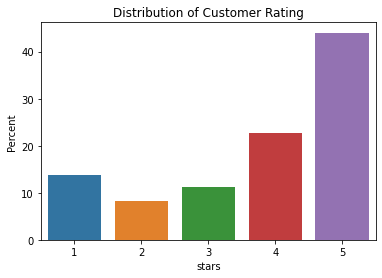

In [8]:
#Bar graph shows customer's rating distribution
ax = sns.barplot(data=df_review, x='stars', y='stars', estimator=lambda x: len(x) / len(df_review) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

The majority of guests were pleased with the eateries, with almost 70% giving it a rating of 4 or 5. The rating has remained very consistent at 4 throughout time.

In [9]:
#Mean and Correlation for features: cool, useful, funny
stars = df_review.groupby('stars').mean()
print('Mean value of the review\'s stars:')
stars



Mean value of the review's stars:


,useful,funny,cool,length
stars,,,,
1,1.626292,0.525556,0.206080,706.657453
2,1.307921,0.518696,0.311072,730.656869
3,1.077009,0.449377,0.476346,684.468103
4,1.098020,0.415390,0.639568,600.467605
5,0.888277,0.250068,0.442009,465.731113


In [10]:
print('Correlation value of the review\'s stars:')
stars.corr()

Correlation value of the review's stars:


,useful,funny,cool,length
useful,1.000000,0.839733,-0.748369,0.750935
funny,0.839733,1.000000,-0.488887,0.979543
cool,-0.748369,-0.488887,1.000000,-0.479402
length,0.750935,0.979543,-0.479402,1.000000


3. Heat map 

Text(0.5, 1.0, 'Heat map of Correlations between features: cool, useful, funny, and length')

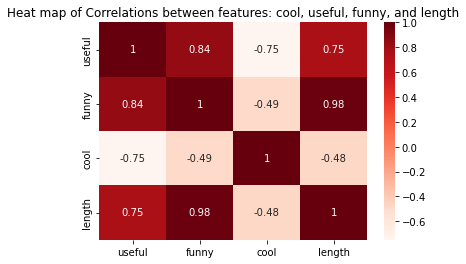

In [11]:
sns.heatmap(data=stars.corr(), annot=True,cmap='Reds')
plt.title("Heat map of Correlations between features: cool, useful, funny, and length")

According to the heat map, there is the strongest possitive correlation between *funny* and *length*, and *useful* also has strong correlated with *funny*. There is also a negative correlation relationship between *cool* and the other three features.

### Data Processing

When working with text-based data, it's best to keep the number of words and characters as low as possible so that your code doesn't run for hours. We want to execute this while still keeping the critical keywords, such as 'good' or 'awful,' which give us an indication of the reviewer's sentiments.

**Stop words**, for instance 'the,' 'or,' and 'is,' aren't necessary. It's pointless to waste time and processing resources going through these stop words, so there are should be eliminate.

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


example_sent = """This is a sample sentence,
                  showing off the stop words filtration."""

stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(example_sent)
 
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
#Preparing for classification
#df_class = df_review[(df_review['stars']==1) | (df_review['stars']==5)]
#df_class.shape

#putting them in seperate variable
#x = df_class['text']
#y = df_class['stars']
#print(x.head())
#print(y.head())


In [14]:
# Data preprocess - score 4,5 to positive (1) and score 1,2 to negtive(0)
def sentiment_assign(x):
  if x ==3:
    return None
  return 1 if x > 2 else 0
df_review['sentiment'] = df_review["stars"].apply(sentiment_assign )


In [15]:
# Observe data, here we find out the data is not balance
empty_text = (df_review['text'].isnull() \
            | df_review['sentiment'].isnull())
df_review = df_review[~empty_text]
print(df_review['sentiment'].value_counts())

1.0    133610
0.0     44068
Name: sentiment, dtype: int64


In [16]:
#Imbalence data preprocess - unsample data with 40,000 data for each sentiment level 
def sample_data(n):
    return pd.concat([df_review[df_review['sentiment'] == i].head(n) for i in range(0,2)])
df_resample = sample_data(40000)

In [17]:
#df_resample

In [18]:
!pip install gensim

In [ ]:
#NLP pipeline

#Tokenize
from gensim.utils import simple_preprocess 
df_resample['prep'] = df_resample['text'].apply(simple_preprocess)
print("Finish Tokenize")

#Stemming words and case lower
from gensim.parsing.porter import PorterStemmer
def stem(ws):
  return [PorterStemmer().stem(w) for w in ws]

df_resample['prep'] = df_resample['prep'].apply(stem)
print("Finish Stem")

#join word list to sentence
def toSentence(x):
  return " ".join(x)

df_resample['clean'] = df_resample['prep'].apply(toSentence)

Finish Tokenize


In [ ]:
#show top ten after data preprocessing
df_resample['clean'].head(10)


### Split dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

def split_train_test(data, test_size=0.2, shuffle_state = True):
    FEATURES = ['clean']
    X_train, X_test, Y_train, Y_test = train_test_split(
                                                        data[FEATURES],
                                                        data['sentiment'], 
                                                        shuffle = shuffle_state,
                                                        test_size = test_size, 
                                                        random_state = 32)

     
    X_test, X_valid , Y_test, Y_valid = train_test_split(
                                                    X_test,
                                                    Y_test, 
                                                    shuffle = shuffle_state,
                                                    test_size = test_size, 
                                                    random_state = 32)
    print("Term frequency (training)")
    print(Y_train.value_counts())
    print("Term frequency (testing)")
    print(Y_test.value_counts())
    print("Term frequency (validation)")
    print(Y_valid.value_counts())
    
    
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    X_valid = X_valid.reset_index()
    
    Y_train = Y_train.to_frame()    
    Y_train = Y_train.reset_index()
    
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    
    Y_valid = Y_valid.to_frame()
    Y_valid = Y_valid.reset_index()
  
    
    return X_train, X_test, Y_train, Y_test, X_valid, Y_valid

# Call the train_test_split
X_train, X_test, Y_train, Y_test, X_valid, Y_valid = split_train_test(df_resample)

In [ ]:
df_resample.clean

### Vectorization
The purpose is convert a review which in String type into a vector. Hence, we can use it to for modelling

**TF-IDF**: It is a statistical method for analysing a collection or corpus. This method determines the significance of a word in a document. We utilised TF-IDF to transform text into numerical vector representations.

In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import words
params = {
          "ngram_range" : (1,3),
          "max_features" : 30000,
          "stop_words" :"english"
}
tfidf = TfidfVectorizer(**params)

# print(X_train['stem_tokens'])
train_tv = tfidf.fit_transform(X_train['clean'])
test_tv = tfidf.transform(X_test['clean'])

vocab = tfidf.get_feature_names()


In [ ]:
vocab

### Modelling

#### 1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()
rnd_clf.fit(train_tv,Y_train['sentiment'])
Y_pred = rnd_clf.predict(test_tv)

#Confusion Matrix
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(Y_test['sentiment'],Y_pred))

#Accuracy score
print("Score:",accuracy_score(Y_test['sentiment'], Y_pred))

#Clasification Report
print("Classification Report:",classification_report(Y_test['sentiment'],Y_pred))

### ANN with grid search


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

In [ ]:
ann_clf = MLPClassifier(learning_rate_init=0.01, max_iter=500, random_state=42, hidden_layer_sizes=(5,2))
ann_clf.fit(train_tv, Y_train['sentiment'])
train_score = ann_clf.score(train_tv, Y_train['sentiment'])
test_score = ann_clf.score(test_tv, Y_test['sentiment'])

print("Training accuracy: {:.3f}".format(train_score))
print("Test accuracy:{:.3f}".format(test_score))
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(Y_test['sentiment'],Y_pred))

Y_pred = ann_clf.predict(test_tv)
#Clasification Report
print("Classification Report:",classification_report(Y_test['sentiment'],Y_pred))

## Due to our word dataset is huge, using Grid search is not efficient so I comment the grid search step


#### setting the parameter grid
params = { 'learning_rate_init':[ 0.01, 0.001],
            'max_iter':[500,1000] }

#### perform hyperparameter tuning
clf = GridSearchCV( MLPClassifier(random_state=42), params, cv=5, scoring= 'accuracy' )
clf.fit(train_tv,Y_train['sentiment'])

#### view accuracy scores for all the models
means = clf.cv_results_['mean_test_score']
std = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, std, clf.cv_results_['params']):
    print('%0.5f (+/-%0.05f) for %r' %(mean, std*2, params))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss

### Voting model

In [ ]:
#Names of the various classification approaches for easy presentation of the results
names = ["Logististic Regression", "Nearest Neighbors", 
          "Decision Tree",  "XGBoost","Majority Vote",
         "AdaBoost"]

scores = [] #list variable to hold classification scores (predictive accuracy scores)

#Prepare models for VotingClassifier 
#creeate instances (i.e., objects) of the various classifiers
lr =LogisticRegression()
knn = KNeighborsClassifier(8)
linear_svc = SVC(kernel="linear", C=0.01, probability=True)
gamma_svc = SVC(gamma=2, C=1, probability=True)
dtc = DecisionTreeClassifier(max_depth=10)
gnbs = GaussianNB()
rnd_clf1 = RandomForestClassifier()
ann_clf1= MLPClassifier(learning_rate_init=0.01, max_iter=500, hidden_layer_sizes=(5,2))
xgb_clf=XGBClassifier(early_stopping_rounds=2000)

#specify the VotingClassifier() - create instance

mv_clf = VotingClassifier(estimators=[ ('logistic', lr), 
                                      ('XGbost', xgb_clf),
                                      ('ANN', ann_clf1), 
                                      ('Random Forest', rnd_clf1)
                                     ]
                          , voting='soft')

classifiers = [
    lr,
    knn,
    dtc,
    xgb_clf,
    mv_clf,
    AdaBoostClassifier()
    ]

#run classification models using Pipeline
for classifier in classifiers:
    print(classifier)
    pipeline = Pipeline(steps=[
                      ('classifier', classifier)])
    pipeline.fit(train_tv, Y_train['sentiment'])   
    
    scores.append(pipeline.score(test_tv, Y_test['sentiment']))
    print("model score: %.3f" % pipeline.score(test_tv, Y_test['sentiment']))
    print("\n -----------------------------------------------------------------------------------")
    
#end of pipeline

#Create a dataframe for prediction scores
scores_df = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy Score'])

In [ ]:
scores_df

## Prediction 

#### Preprocess the new data

The best model is the voting classifier. We have 8000 unused data to make prediction. 4000 sample have actual positive response, and 4000 sample have actual negative response. 

#### Preprocess data

In [ ]:
df_new = sample_data(44000)
df_new=pd.concat([df_new.iloc[40000:44000],df_new.iloc[84000:88000]])

#NLP pipeline
#Tokenize
from gensim.utils import simple_preprocess 
df_new['prep'] = df_new['text'].apply(simple_preprocess)
print("Finish Tokenize")

#Stemming words and case lower
from gensim.parsing.porter import PorterStemmer
def stem(ws):
  return [PorterStemmer().stem(w) for w in ws]

df_new['prep'] = df_new['prep'].apply(stem)
print("Finish Stem")

#join word list to sentence
def toSentence(x):
  return " ".join(x)

df_new['clean'] = df_new['prep'].apply(toSentence)

### Predicting result

#### Confusion Matrix

In [ ]:
valid_tv = tfidf.transform(df_new['clean'])

Y_valid_pred = mv_clf.predict(valid_tv)
validation_score = mv_clf.score(valid_tv, df_new['sentiment'])
print("Validation accureacy: {:.3f}".format(validation_score))
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(df_new['sentiment'],Y_valid_pred))


#### Clasification Report

In [ ]:
print("Classification Report:",classification_report(df_new['sentiment'],Y_valid_pred))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

logit_roc_auc = roc_auc_score(df_new['sentiment'], mv_clf.predict(valid_tv))
fpr, tpr, thresholds = roc_curve(df_new['sentiment'], mv_clf.predict_proba(valid_tv)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()